# Generic Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import adjusted_mutual_info_score
from sklearn.manifold import TSNE
from umap import UMAP

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

import os

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\umap\d

In [2]:
os.chdir("C:/Users/miche/Downloads/AI_Lab")

In [3]:
df_HCC = pd.read_csv("DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_HCC = df_HCC.iloc[:-1,:].T
df_HCC.head()

,"""H1-5""","""MALAT1""","""MT-RNR2""","""ARVCF""","""BCYRN1""","""ATXN7L2""","""IGFBP3""","""H1-3""","""CTIF""","""RNF123""",...,"""ZFAS1""","""BATF3""","""CDKN3""","""DLD""","""PMPCA""","""ZNF165""","""SCCPDH""","""NTAN1""","""CLIP2""","""DUSP23"""
"""AAAAAACCCGGC_Normoxia""",2,3,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCGGATGC_Normoxia""",2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACGAGCTAG_Normoxia""",5,2,0,0,1,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACTTCCCCG_Normoxia""",1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAAGCCTACCC_Normoxia""",0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_MCF = pd.read_csv("DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF = df_MCF.iloc[:-1,:].T
df_MCF.head()

,"""MALAT1""","""MT-RNR2""","""NEAT1""","""H1-5""","""TFF1""","""MT-RNR1""","""H4C3""","""GDF15""","""KRT81""","""MT-CO3""",...,"""SMIM27""","""MROH1""","""SKIDA1""","""MICALL1""","""RARG""","""MYO1F""","""BRWD1-AS2""","""RPS19BP1""","""AUNIP""","""TNK2"""
"""AAAAACCTATCG_Normoxia""",1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACAACCCTA_Normoxia""",3,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACACTCTCA_Normoxia""",3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCAGGCAC_Normoxia""",6,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCTAGCTC_Normoxia""",4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
Y_HCC = [int(i.split("_")[1]=='Normoxia"') for i in df_HCC.index]
print(Y_HCC.count(0), Y_HCC.count(1))

8899 5783


In [4]:
Y_MCF = [int(i.split("_")[1]=='Normoxia"') for i in df_MCF.index]
print(Y_MCF.count(0), Y_MCF.count(1))

8921 12705


In [53]:
df_HCC_DS_tr,df_HCC_DS_ts,y_HCC_DS_tr,y_HCC_DS_ts = train_test_split(df_HCC,Y_HCC, test_size=0.2, random_state=0)

In [5]:
df_MCF_DS_tr,df_MCF_DS_ts,y_MCF_DS_tr,y_MCF_DS_ts = train_test_split(df_MCF,Y_MCF, test_size=0.2, random_state=0)

---
---
---
# Dimensionality Reduction

---
## Blackbox Functions

In [6]:
#Gives the 2-D Plot based on the model's Dimensionality Reduction
def Plot(X, Y, model):
    model.set_params(n_components=2)
    m = model.fit_transform(X)
    colors = ["red","blue"]
    condc = [colors[i] for i in Y]
    cluster_names = ["Hypoxia", "Normoxia"]
    visual = pd.DataFrame(m, columns=["PC1","PC2"])
    plt.scatter(visual["PC1"], visual["PC2"], c=condc, s=20)
    handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=cluster_names[i]) for i, color in enumerate(colors)]
    legend = plt.legend(handles=handles, loc="best", title="Conditions")
    plt.show()

In [7]:
def Var_Predicted(X, model,n):
    pred_var_expl = []
    model.set_params(n_components=n)
    matrix = model.fit_transform(X)
    for i in range(1,n+1):
        matrix_current = pd.DataFrame(matrix[:,:i])
        pls = PLSRegression(n_components=i)
        pls.fit(matrix_current, X)                                              
        y = pls.predict(matrix_current)
        pred_var_expl.append(r2_score(X,y,multioutput="variance_weighted"))     
    return pred_var_expl

In [8]:
#Function for 95% explained variance definition
def numb_comp(X, model, eps = 0.95, n=100):
    vars = Var_Predicted(X,model,n)
    for i in range(len(vars)):
        if vars[i]>=0.95:
            return vars, i
    return vars, n

In [9]:
#Plots the Explained Variance based on the Number of Components
def Var_Plot(X, model, eps=0.95, n=100):
    variances, C = numb_comp(X, model, eps)
    print("The Opitmal Number of Dimensions for PCA is", C)
    plt.plot(range(1,n+1), variances, '-', linewidth=2)
    plt.plot([C, C], [0, eps], "k:")
    plt.plot([0, C], [eps, eps], "k:")
    plt.xlabel('Dimensions')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()


In [10]:
def Blackbox(X,Y, model):
    Var_Plot(X, model)
    Plot(X,Y,model)

---
## PCA

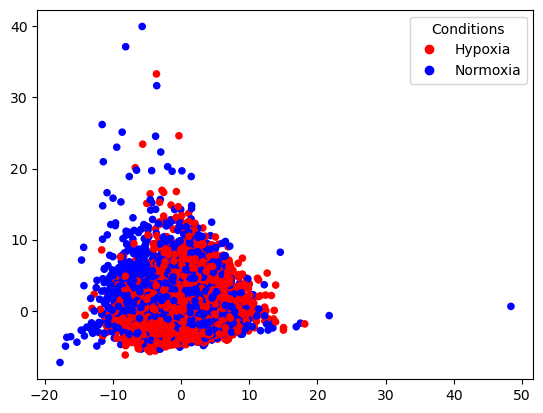

In [56]:
Plot(df_HCC_DS_tr,y_HCC_DS_tr, PCA())

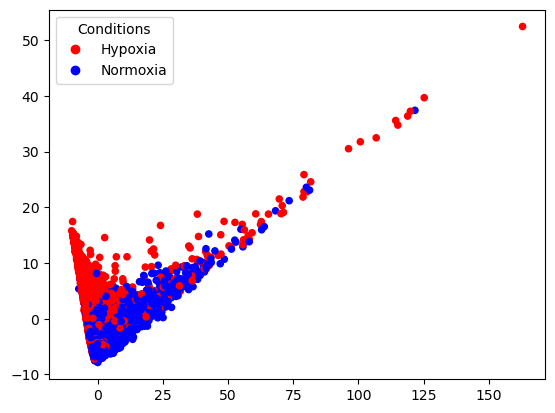

In [57]:
Plot(df_MCF_DS_tr,y_MCF_DS_tr,PCA())

---
## t-SNE

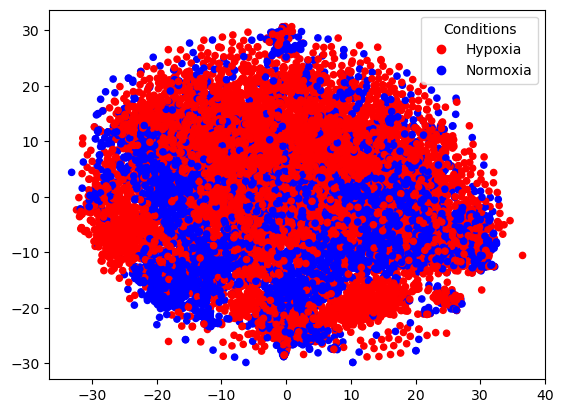

In [58]:
Plot(df_HCC_DS_tr,y_HCC_DS_tr,TSNE(random_state=69))

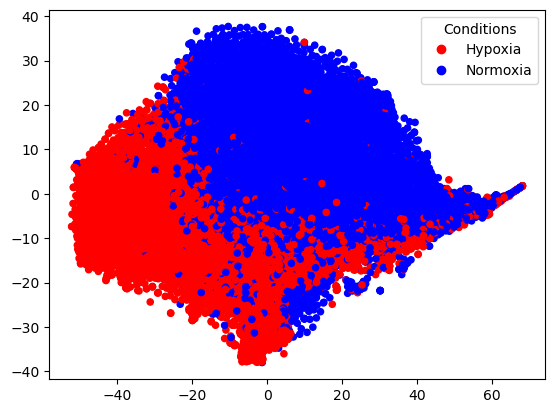

In [59]:
Plot(df_MCF_DS_tr,y_MCF_DS_tr,TSNE(random_state=69))

---
## UMAP

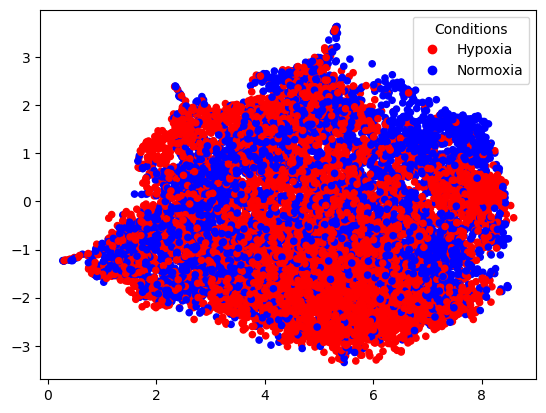

In [60]:
Plot(df_HCC_DS_tr, y_HCC_DS_tr, UMAP(random_state=69))

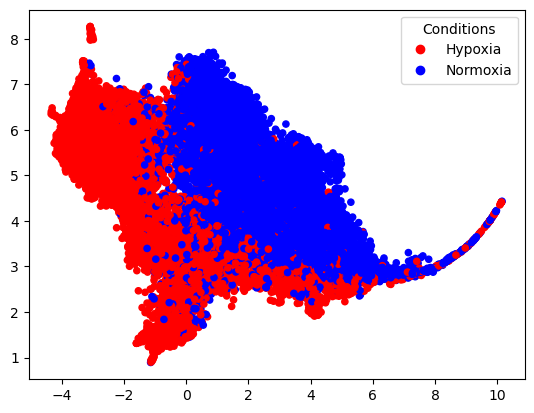

In [61]:
Plot(df_MCF_DS_tr,y_MCF_DS_tr,UMAP(random_state=69))

Compared to the SmartS datasets, the Dropsec ones give much more confused clusters, with only a good division in the case of MCF for t-SNE and UMAP.

---
---
---
# Clustering

---
## Two Components Dimensionsionality Reduction

In [13]:
def Two_Comp_DR(X,model):
    model.set_params(n_components=2)
    m = model.fit(X)
    mnew = m.fit_transform(X)
    x_fit = pd.DataFrame(mnew, columns=["PC1","PC2"])
    return x_fit, m

---
---
## HCC

---
## KMeans on Full Dimensions

In [15]:
def OptimalN(X, Y):
    df = pd.DataFrame(columns=['Clusters', 'AMI'])
    for n in range(11,21):
        method=KMeans(n_clusters=n, random_state=1)
        method.fit(X)
        labels = method.fit_predict(X)
        ami = adjusted_mutual_info_score(Y, labels)
        row = {'Clusters': n, 'AMI':ami}
        df = df.append(row, ignore_index=True)
    max_row = df.loc[df['AMI'].idxmax()]
    return int(max_row[0])

In [16]:
def Labels_Post_Process(n, Labels,Y):
    d={}
    for x in range(n):
        indices = [i for i in range(len(Labels)) if Labels[i] == x]
        corresp_y = [Y[i] for i in indices]
        expected = np.argmax(np.bincount(corresp_y))
        d[x] = expected

    for i in range(len(Labels)):
        Labels[i] = d[Labels[i]]
    return d, Labels

In [17]:
def KM_Clustering(X, Y, n):
        method=KMeans(n_clusters=n, random_state=1)
        method.fit(X)
        labels = method.fit_predict(X)
        d, l = Labels_Post_Process(n, labels, Y)
        return d, l

In [18]:
def Ultra_KMeans(X,Y,model):
    Number = OptimalN(X,Y)
    print(Number)
    d, Labels = KM_Clustering(X, Y, Number)
    Plot(X,Labels,model)
    model1 = model.fit(X)
    km = KMeans(n_clusters=Number, random_state=1)
    model2 = km.fit(X)
    return model1, model2, d

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_57000\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

13


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


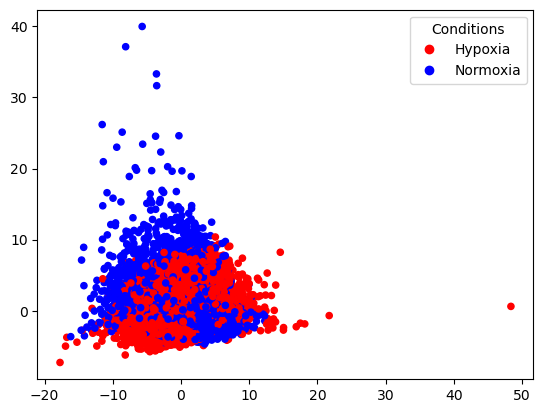

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
kmpca_hcc = Ultra_KMeans(df_HCC_DS_tr,y_HCC_DS_tr, PCA())

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_57000\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

13


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


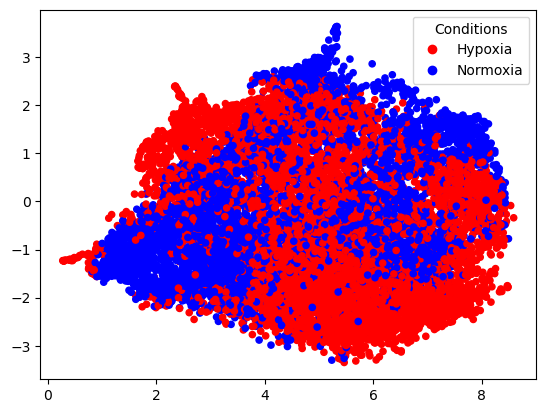

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
kmumap_hcc = Ultra_KMeans(df_HCC_DS_tr,y_HCC_DS_tr,UMAP(random_state=69))

Similarly to the previous dataset, we tried applying the clustering to the full dataset, and the results obtained in this method are already much better compared to the previous attempt.

---
### Testing

In [19]:
def Test_1(models, X_test, Y_test):
    dr = models[0]
    km = models[1]
    lpp = models[2]
    labels = km.predict(X_test)

    for i in range(len(labels)):
        labels[i] = lpp[labels[i]]
    ys = [int(i) for i in Y_test]
    count=0
    for i in range(len(ys)):
        if ys[i] != labels[i]:
            count += 1
    print(count/len(ys))

In [73]:
Test_1(kmpca_hcc,df_HCC_DS_ts,y_HCC_DS_ts)

0.24208375893769152


We decided to test the correctness of our classification to a test dataset, and our classifier got the correct result in around 75% of the given inputs.

---
## KMeans on Reduced Dimensions

In [11]:
def Plot_2(X,Y):
    colors = ["red","blue"]
    condc = [colors[i] for i in Y]
    cluster_names = ["Hypoxia", "Normoxia"]
    plt.scatter(X["PC1"], X["PC2"], c=[colors[i] for i in Y], s=20)
    handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=cluster_names[i]) for i, color in enumerate(colors)]
    legend = plt.legend(handles=handles, loc="best", title="Assigned Labels")
    plt.show()

In [12]:
def KMR_Clustering(X,Y,model):
    X_R, model1 = Two_Comp_DR(X,model)
    Number = OptimalN(X_R,Y)
    print(Number)
    d, Labels = KM_Clustering(X_R, Y, Number)
    Plot_2(X_R, Labels)
    km = KMeans(n_clusters=Number, random_state=1)
    model2 = km.fit(X_R)
    return model1, model2, d

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_57000\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

13


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


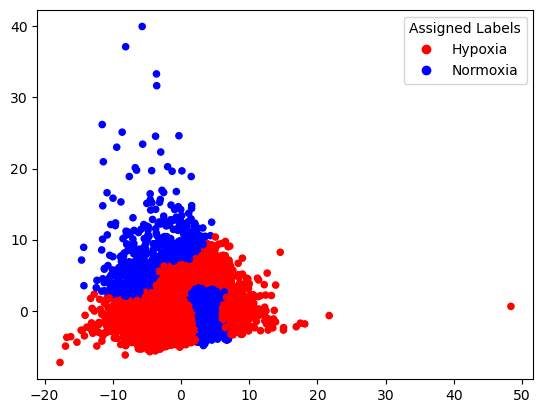

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
kmrpca = KMR_Clustering(df_HCC_DS_tr,y_HCC_DS_tr,PCA())

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_57000\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

15


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


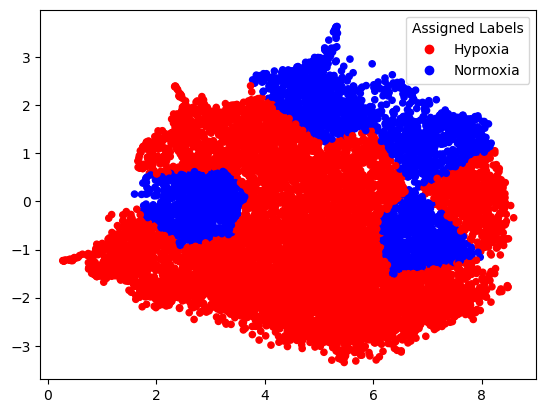

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
kmrumap = KMR_Clustering(df_HCC_DS_tr,y_HCC_DS_tr,UMAP(random_state=69))

---
### Test

In [20]:
def Test_2(models, X_test, Y_test):
    dr = models[0]
    km = models[1]
    lpp = models[2]
    try:
        X_ts = models[0].transform(X_test)
    except AttributeError:
        X_ts = models[0].fit_transform(X_test)
    labels = km.predict(X_ts)

    for i in range(len(labels)):
        labels[i] = lpp[labels[i]]
    ys = [int(i) for i in Y_test]
    count=0
    for i in range(len(ys)):
        if ys[i] != labels[i]:
            count += 1
    print(count/len(ys))

In [79]:
Test_2(kmrpca, df_HCC_DS_ts, y_HCC_DS_ts)
#13 => 0.63

0.36840313244807626


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [80]:
Test_2(kmrumap, df_HCC_DS_ts, y_HCC_DS_ts)
#15 => 0.65

0.3455907388491658


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


The results seem much worse compared to the full dimensions clustering, which was confirmed by the tests, which gave accuracies of around 63-65%.

---
---
## MCF

---
## KMeans on Full Dimensions

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_107364\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  wa

13


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


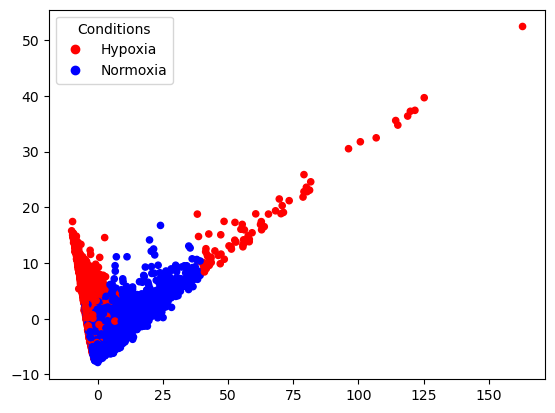

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
kmpca_mcf = Ultra_KMeans(df_MCF_DS_tr,y_MCF_DS_tr,PCA())

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_107364\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  wa

13


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


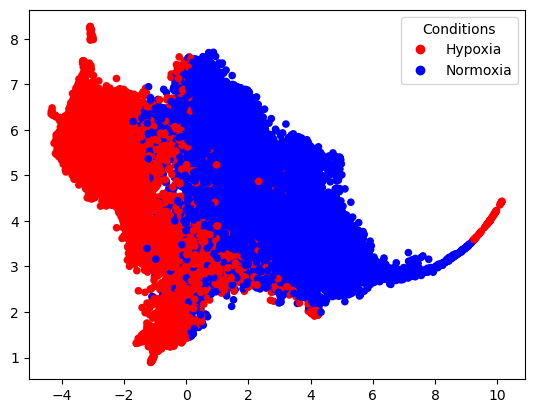

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
kmumap_mcf = Ultra_KMeans(df_MCF_DS_tr, y_MCF_DS_tr, UMAP(random_state=69))

In [23]:
Test_1(kmpca_mcf, df_MCF_DS_ts, y_MCF_DS_ts)

0.0850670365233472


As in the case of SmartSec, testing the classifier on the test set gives us correct predictions in 98.2% of the instances, an extremely good result.

---
## KMeans on Reduced Dimensions

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_107364\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  wa

11


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


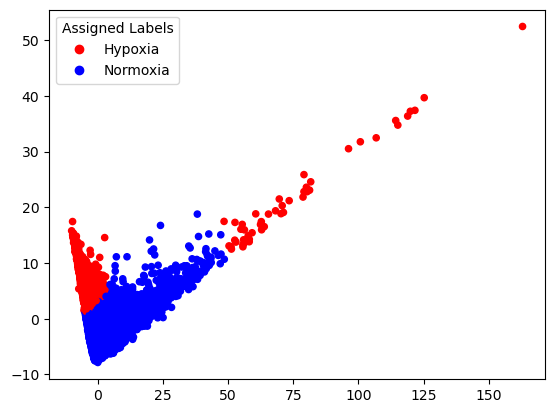

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
kmrpca_mcf = KMR_Clustering(df_MCF_DS_tr,y_MCF_DS_tr,PCA())

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\miche\AppData\Local\Temp\ipykernel_107364\3465106684.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  wa

11


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


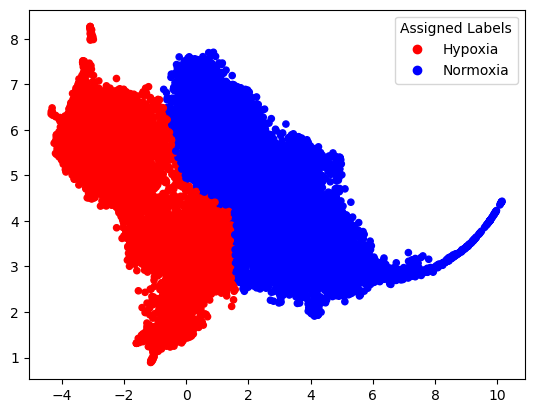

c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
kmrumap_mcf = KMR_Clustering(df_MCF_DS_tr,y_MCF_DS_tr,UMAP(random_state=69))

In [27]:
Test_2(kmrpca_mcf,df_MCF_DS_ts,y_MCF_DS_ts)

0.2061950993989829


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [28]:
Test_2(kmrumap_mcf, df_MCF_DS_ts, y_MCF_DS_ts)

0.12829403606102635


c:\Users\miche\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Again, KMeans obtains extremely good results also on the reduced datasets, with classifiers with precision of 80-88% in the two cases of dimensionality reduction applied.

To conclude, clustering gives us some interesting information on the datasets, but it might be more useful to use another model for predictions.